<a href="https://colab.research.google.com/github/jarminett/DCP/blob/main/Tarea05/Tarea05_Luis_Florian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **UNIVERSIDAD GALILEO**
### Mestría en Data Science
#### Luis Florian, 0710072


In [ ]:
import numpy as np

### **Ejercicio 1 :**
Usando unicamente NumPy crea un vector de este tipo con el nombre xs

[0. , 0.1 , 0.2 , 0.3 , 0.4 , 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.7 , 0.8 , 0.9 , 1. ]


In [ ]:
a = np.linspace(0,0.5,num=6)
b = np.linspace(0.51, 0.59,num=9)
c = np.linspace(0.6,1,num=5)
xs = np.hstack((a,b,c))
xs

array([0.  , 0.1 , 0.2 , 0.3 , 0.4 , 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.7 , 0.8 , 0.9 , 1.  ])

### **Ejercicio 2:**
En este ejercicio debemos remplazar el calculo de ys para hacerlo de manera "vectorizada" y eliminar el ciclo for. 

In [ ]:
sample_points = 10000
inicio_intervalo = 0
ruido = 0.5*np.random.randn(sample_points) #el ruido comunmente se debe a aleatoriedad o captura no exacta de info.
x = np.linspace(inicio_intervalo,5*np.pi,sample_points) 
y = np.sin(x) + ruido

#ys es "y suavizado", inicialmente es una copia de y
ys =  y.copy()

ys2 = np.cumsum(ys,dtype=float)
ys2[3:] = ys2[3:] - ys2[:-3]
#First 3 elements sum is on position 2 of cumsum.
ys2 = ys2[2:]/3

print(ys2)



[ 0.25826336  0.32794336  0.41375493 ... -0.2057877   0.34511954
  0.53244143]


### **Ejercicio 3:**
Para calcular la información de una distribución de probabilidad necesitamos calcular el producto entre la información de cada posible x y su probabilidad , cada uno de estos elementos nos indica cuanta incerteza aporta cada x a la entropía de la distribución. Crea una función que calcule esto, debe recibir un vector representando a la dist. de probabilidad y devoler otro vector con el termino de entropía para cada x. Por ejemplo:

calcular_entropia([0.25,0.75])

Debe resultar en :

[0.5 , 0.31127812]

In [ ]:
def calcular_entropia(px):
  return np.log2(px)*px*-1

print(calcular_entropia([0.25,0.75]))

[0.5        0.31127812]


### **Ejercicio 4:**
Cree una función para calcular este modelo sobre valores de de gasto de nuevos clientes , y luego cree una función ganancia_neta(x,g,c) donde:

    x = vector conteniendo los valores de gasto del primer mes para nuevos clientes.
    g = función que estima la ganancia en función de x
    c = función que estima el costo en función de x


In [ ]:
def g(x):
  ''' Devuelve las ganancias '''    
  ganancia = (np.power(x,3) + 2.0*(np.power(x,2.0))+np.exp(0.0001*x) - np.sqrt(2.0*x))/50
  return ganancia 

def c(x):
  ''' Devuelve los costos '''
  costo = (np.power(x,2) + x + np.log(0.0001*x) - np.sqrt(0.54*x))/100
  return costo

def ganancia_neta(x,g,c):
  ''' Devuelve ganancia neta '''
  return g(x) - c(x)

x = np.array([100,50,25,100]) 

print("Ganancia Neta = ",ganancia_neta(x,g,c))


Ganancia Neta =  [20298.85689469  2574.42504495   330.9752857  20298.85689469]


### **Ejercicio 5:**
Aritmética Acumulativa\
Podemos usar la funcion np.cumsum para esto, en este ejercicio necesitamos determinar el "lifetime value" de cierto usuario en su 6to mes:

In [ ]:
def lifetime_value(ganancias_mensuales):
    return np.cumsum(ganancias_mensuales)

# Prueba:
ganancias_usuario = np.array([25,150,125,75,100,45,22,30])
lifetime_value_usuario = lifetime_value(ganancias_usuario)

print("Lifetime value:",lifetime_value_usuario)

print("El valor del usuario a su sexto mes es :",lifetime_value_usuario[5])

Lifetime value: [ 25 175 300 375 475 520 542 572]
El valor del usuario a su sexto mes es : 520


### **Ejercicio 6:**
Usando argmax crear una función mode(x) para calcular la moda de un vector x , esta función debe devolver una tupla de 2 elementos de la forma: (valor,conteo)

In [ ]:
from collections import Counter

def mode(x):
  count = Counter(x)
  k = np.array(list(count.keys()))
  v = np.array(list(count.values()))
  mayor = np.argmax(v)
  tupla = (k[mayor], v[mayor])
  return tupla
  
x = [1,3,8,10,10,10,10,10,55,2,1,3,4,3]

mode(x)

(10, 5)

### **Ejercicio 7:**
Crear una función para calcular la entropía  de una distribución de probabilidad representada como un vector.
$$S = -\sum_i^nP(x_{i})log_{2}P(x_{i})$$

In [ ]:
def entropia(px):
  return np.sum(np.log2(px)*px)*-1

print("Entropia = ",entropia([0.25,0.75]))


Entropia =  0.8112781244591328


### **Ejercicio 8:**
<img src="https://image.slidesharecdn.com/publishintroductiontodeeplearninginpythonandmatlab1-160502102437/95/introduction-to-deep-learning-in-python-and-matlab-54-638.jpg?cb=1462185644">

In [ ]:
def cross_entropy(Y,Y_hat):
  return np.nansum(np.log(Y_hat)*Y)*-1    

y  = np.array([1.0,0,0])
y_hat = np.array([0.7,0.2,1]) # <- resultado de algun modelo predictivo

cross_entropy(y,y_hat)

0.35667494393873245

### **Ejercicio 9 :**
Crear una función que reciba como parámetro un vector x y calcule su magnitud o norma(euclidiana o L2), luego usarla para evaluar 2 vectores 
que representan los errores generados por 2 modelos de machine learning y concluir cual de los 2 modelos es mejor.

In [ ]:
def magnitud(x):    
    return np.sqrt(np.sum(np.power(x,2))) # raiz cuadrada

errores_modelo1 = np.array([1,2,1,2]) #
errores_modelo2 = np.array([0,1,1,2]) #

print("Magnitud Errores Modelo1 = " + str(magnitud(errores_modelo1)))
print("Magnitud Errores Modelo2 = " + str(magnitud(errores_modelo2)))

# elegir el mejor modelo con una condicional(if)
if magnitud(errores_modelo1) > magnitud(errores_modelo2):
  print("El modelo 2 es el mejor")
elif magnitud(errores_modelo1) < magnitud(errores_modelo2):
  print("El modelo 1 es el mejor")
else:
  print("Ambos modelos son equivalentes")

Magnitud Errores Modelo1 = 3.1622776601683795
Magnitud Errores Modelo2 = 2.449489742783178
El modelo 2 es el mejor


### **Ejercicio 10 :**
Usando la función del ejercicio anterior, crea otra función normalizar(x) que reciba de parámetro un vector x aplique normalización sobre este, el resultado debe ser un nuevo vector del tamaño de x cuya magnitud es igual a 1.0

In [ ]:
def normalizar(x):
  return x/magnitud(x)    
    
print(magnitud(normalizar(errores_modelo1)))
print(normalizar(errores_modelo2))

1.0
[0.         0.40824829 0.40824829 0.81649658]


### **Ejercicio 11:**

INPUT LAYER: un vector X de tamaño = 2 que representa los datos de entrada
HIDDEN_LAYER :capa oculta con 2 neuronas definidas por los vectores:
- HL1 = [0.25,0.37]
- HL2 = [-8,14]
- OUTPUT_LAYER = capa de salida definida por el vector [4,9]


In [ ]:
def neural_network(x):
  HL1 = np.array([0.25,0.37])
  HL2 = np.array([-8,14])
  OUTPUT_LAYER = np.array([4,9])
  HL1_R = np.dot(x,HL1)
  HL2_R = np.dot(x,HL2)
  if HL1_R > HL2_R:
    print("\nHL1 tiene un patrón de mayor medida en X=",x)
  elif HL2_R > HL1_R:
    print("\nHL2 tiene un patrón de mayor medida en X=",x)
  else:
    print("\nHL2 y HL1 tiene el mismo patrón de medida en X=",x)

  HL_R = np.array([HL1_R,HL2_R])
  O = np.dot(OUTPUT_LAYER,HL_R)
  return O

X1 = np.array([0.50,0.72])
X2 = np.array([-4,7])
X3 = np.zeros_like(X2)
X4 = np.ones_like(X1)
X5 = np.random.randn(X1.shape[0])

print("Output de la Red Neural=",neural_network(X1))
print("Output de la Red Neural=",neural_network(X2))
print("Output de la Red Neural=",neural_network(X3))
print("Output de la Red Neural=",neural_network(X4))
print("Output de la Red Neural=",neural_network(X5))


HL2 tiene un patrón de mayor medida en X= [0.5  0.72]
Output de la Red Neural= 56.2856

HL2 tiene un patrón de mayor medida en X= [-4  7]
Output de la Red Neural= 1176.36

HL2 y HL1 tiene el mismo patrón de medida en X= [0 0]
Output de la Red Neural= 0.0

HL2 tiene un patrón de mayor medida en X= [1. 1.]
Output de la Red Neural= 56.48

HL1 tiene un patrón de mayor medida en X= [-0.0920911 -0.1416612]
Output de la Red Neural= -11.520501492361996


### **Ejercicio 12:**
En este ejercicio usamos correlación cruzada para calcular las medias moviles promediando 3 puntos

In [ ]:
ruido = 0.1*np.random.randn(15) #el ruido comunmente se debe a aleatoriedad o captura no exacta de info.
x = np.linspace(0,2*np.pi,15) 
y = np.sin(x) + ruido

filtro = np.array([1/3,1/3,1/3]) #para lograr las medias moviles a traves de correlacion cruzada

## tu codigo aqui (~ 3 linea de codigo)
mm = y.copy()
print("\n",mm)
for i in range(0,len(mm)-2):
  mm[i+1] = np.dot(mm[i:i+3],filtro)

print("\n",mm)





 [-0.05336708  0.36274363  0.60008493  1.0282884   0.96472474  0.83125752
  0.54808382 -0.15970357 -0.52693535 -0.66214932 -0.99309201 -0.97754592
 -0.80626503 -0.73796016 -0.01174517]

 [-0.05336708  0.30315383  0.64384239  0.87895184  0.8916447   0.75699535
  0.38179187 -0.10161568 -0.43023345 -0.69515826 -0.88859873 -0.89080323
 -0.81167614 -0.52046049 -0.01174517]


### **Ejercicio 13:**
Dado el vector x, usar operadores lógicos sobre vectores y acceso a elementos usando vectores booleanos , escribir un programa que calcule eun nuevo vector z conteniendo el valor absoluto de el vector x.

In [ ]:
x = np.linspace(-2,2,9)
print("Original x = ",x)
x[x<0] = x[x<0]*-1
print("Abs x = ",x)

Original x =  [-2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5  2. ]
Abs x =  [2.  1.5 1.  0.5 0.  0.5 1.  1.5 2. ]


### **Ejercicio 14:**
Implementar la función:
$$h(x) = \begin{cases}0 & x< 0\\1 & 0<=x <=1\\0 & x> 1\end{cases}$$

In [ ]:
def h(x):
  uno = np.logical_and(x>=0,x<=1)
  x[uno] = 1
  x[x<0] = 0
  x[x>1] = 0   
  return x

x = np.array([0.1,-2,0.5,5,0.9,-0.7,-10])
print(h(x))

[1. 0. 1. 0. 1. 0. 0.]


### **Ejercicio 15:**
Usando select implementar una función k(x) con la siguiente definición:
$$k(x) = \begin{cases}-x & x< 0\\x^{3}  &0<=x<1\\x^{2}  &1<=x<2\\4  &otherwise\end{cases}$$

In [ ]:
def k(x): 
  x3 = np.logical_and(x>=0,x<1)
  x2 = np.logical_and(x>=1,x<2)
  condiciones = [x<0, x3, x2]
  resultados = [x*-1, x**3, x**2]
  y = np.select(condiciones,resultados,4)
  return y

x = np.array([-1,-5,0.5,1,2,1.5,2.9,7])
print("   x = ",x)
print("k(x) = ", k(x))

   x =  [-1.  -5.   0.5  1.   2.   1.5  2.9  7. ]
k(x) =  [1.    5.    0.125 1.    4.    2.25  4.    4.   ]


### **Ejercicio 16:**
Investigar piecewise y:
*  Usarlo para implementar la función anterior de manera eficiente
*  Usar piscewise para implementar la función:

$$m(x) = \begin{cases}e^{2x} & x< 0\\1  &0<=x<1\\e^{1-x}  &x>=1\\\end{cases}$$

In [ ]:
def m(x):
  uno = np.logical_and(x>=0,x<1)
  condiciones = [x<0, uno, x>=1]
  resultados = [lambda x: np.e**(2*x), 1, lambda x:np.e**(1-x)]
  return np.piecewise(x,condiciones,resultados)

x = np.array([-1,-5,0.5,1,2,1.5,2.9,7])
print("   x = ",x)
print("m(x) = ", m(x))

   x =  [-1.  -5.   0.5  1.   2.   1.5  2.9  7. ]
m(x) =  [1.35335283e-01 4.53999298e-05 1.00000000e+00 1.00000000e+00
 3.67879441e-01 6.06530660e-01 1.49568619e-01 2.47875218e-03]


# Investigación

### **Proyección Vectorial**

La proyección vectorial de *v* sobre *w* no es más que la "sombra" de *v* en *w*.  La proyección vectorial también es llamada vector component or vector resolution.

**Ejemplo:**  En el siguiente ejemplo se muestra en verde el vector resultado de la proyeccion del vector **u** sobre el vector **v**.

<img src="https://ekuatio.com/wp-content/uploads/proyeccion-vectores-3.png">

A continuación se implementa la funcióón proj(v,w), la cual recibe dos vectores y calcula la proyección de v sobre w.

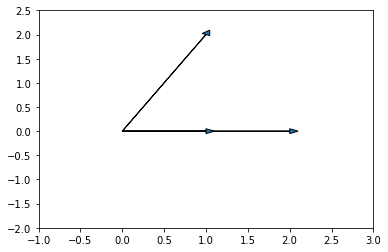

In [ ]:
import matplotlib.pyplot as plt


def proj(v,w):
  '''v on w vector projection'''
  z = w * np.dot(v,w) / np.dot(w,w)
  return z

v = np.array([1,2])
w = np.array([2,0])

z = proj(v,w)

plt.arrow(0,0,v[0],v[1],head_width=0.1,head_length=0.1)
plt.arrow(0,0,w[0],w[1],head_width=0.1,head_length=0.1)
plt.arrow(0,0,z[0],z[1],head_width=0.1,head_length=0.1)

plt.xlim(-1,3)
plt.ylim(-2,2.5)
plt.show()

z = proj(v,w)



**Aplicaciones de Proyección Vectorial**\
Segun investigué hay bastante aplicación de proyecci[on vectorial.  A continuación se nombran algunas de ellas.

*   The QR, the Eigenvalue, and the SVD matrix decomposition.
*   Least Squares, Linear Regression, Multivariate Linear Regression.
*   Dimensionality Reduction, PCA, MDS.



## **Producto Cruz**
El producto cruz es muy utilizado para resolver problemas de ingenieria y física.  Se trata de una operación binaria entre dos vectores, el resultado es un vector perfendicular a estos, y por lo normal al plano que los contiene.  El sentido del vector resultante varía d eacuerdo al ángulo entre los dos vectores iniciales.

A continuación se observa un ejemplo gráfico.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/4e/Cross_product_parallelogram.svg/480px-Cross_product_parallelogram.svg.png">

**Producto Cruz en Numpy**
El cálculo de producto cruz en numpy es simple mediante la función cross, la cual recibe los vectores a calcular producto cruz y devuelve el resultado.

Ejemplo:



In [ ]:
def productoCruz(x,y):
  return np.cross(x,y)

a = np.array([1, 2, 3])
b = np.array([4, 5, 6])

print("  a = ",a)
print("  b = ",b)
print("axb = ",productoCruz(a,b))

  a =  [1 2 3]
  b =  [4 5 6]
axb =  [-3  6 -3]


**Interpretación del producto cruz**

Si dos vectores **u** y **v** son linealmente independientes, es decir, que no están alineados, el producto vectorial entre ellso es un vector perpendicular al plano que ambos forman.

El modulo del producto vectorial es el módulo del primero por el módulo del segundo, multiplicado por el sin del ángulo que ambos forman.  

El sentido depende del orden en que se calcula el producto.  No es lo mismo uxv a vxu.  Debo tomar el angulo del primero al segundo por el camino mas corto.  Es decir, el producto cruz no es comnutativo.  Personalmente me gusta utilizar la ley de la mano derecha para identificar el sentido y dirección del vector resultante del producto cruz.  Es decir si el camino más corto para cerrar el ángulo entre **u** y **v** es a favor de las manecillas del reloj, esto indica que el producto cruz va hacia abajo (-z) y lo contrario si es en contra de las manecillas.

Encontré una imagen que describe lo anterior.

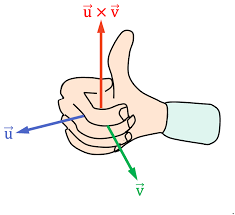



**Aplicación de Producto Cruz**

Las redes neuronales almacenan pesos en matrices. El álgebra lineal hace que las operaciones matriciales sean rápidas y fáciles, 
especialmente cuando se entrena en GPU. De hecho, las GPU se crearon teniendo en cuenta las operaciones vectoriales y matriciales. 
De manera similar a cómo las imágenes se pueden representar como matrices de píxeles, los videojuegos generan experiencias 
de juego atractivas utilizando matrices enormes y en constante evolución. En lugar de procesar los píxeles uno por uno, 
las GPU manipulan matrices completas de píxeles en paralelo. 